## 4. Predicción de fugas de clientes en una compañía telefónica (3.5 puntos)

Una compañía telefónica está interesada en que desarrollemos un modelo que prediga los **100 clientes actuales** (dataset de explotación) que tienen más probabilidad de abandonar la compañía. Para ello nos proporcionan una base de datos **fuga_clientes_empresa_telefonica_construccion.csv** (en carpeta data/) con casos etiquetados, que usaremos para construir nuestro modelo de predicción.

Los campos de esta base de datos son:

* **Customer ID**

* **network_age**: antigüedad del cliente en días

* **Customer tenure in months:** antigüedad del cliente en meses

* **Total Spend in Months 1 and 2:** gasto total del cliente en los meses de referencia 1 y 2

* **Total SMS Spend:** gasto total en SMS

* **Total Data Spend:** gasto total en datos/internet

* **Total Data Consumption:** consumo total de datos (en KB) durante el período de estudio

* **Total Unique Calls:** número total de llamadas únicas

* **Total Onnet spend:** gasto total en llamadas a otros usuarios de la misma red de telefonía

* **Total Offnet spend:** gasto total en llamadas a otros usuarios de redes de telefonía diferentes

* **Total Call centre complaint calls:** número de llamadas de queja al call center

* **Network type subscription in Month 1:** suscripción de tipo de red en el mes 1. Esto indica la suscripción de red preferida de un cliente, lo que puede indicar su tipo de dispositivo: servicio 2G o 3G

* **Network type subscription in Month 2:** igual que el anterior pero en el mes posterior

* **Churn Status**: el valor es 1 si el cliente abandona la compañía telefónica, 0 si permanece en ella

* **Most Loved Competitor network in Month 1:** qué otro proveedor de la competencia prefiere el cliente en el mes 1. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

* **Most Loved Competitor network in Month 2:** qué otro proveedor de la competencia prefiere el cliente en el mes 2. En realidad es un conjunto de columnas, cada una enfocada en un proveedor particular

La variable a predecir es **Churn Status**: el valor es 1 si el cliente **abandona** la compañía, 0 si no la abandona.

La compañía también nos proporciona otra base de datos, **fuga_clientes_empresa_telefonica_explotacion.csv**, con información sobre clientes de los que no se sabe ahora mismo si van a permanecer o no en la compañía. Por tanto en esta segunda base de datos todos los valores de la columna **Churn Status** son missing values (NaN).

La compañía nos pide que proporcionemos los IDs de los 100 clientes de la base de datos de explotación que con mayor probabilidad vayan a abandonar la compañía. Para ello proporcionaremos como entregable a la compañía un archivo csv con una sola columna, **Customer ID**, y 100 filas que contengan los IDs de los clientes seleccionados.

El fichero **ejemplo_fichero_predicciones.csv** contiene un ejemplo con el formato solicitado para este archivo.

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [99]:
datos_construccion = pd.read_csv("./data/fuga_clientes_empresa_telefonica_construccion.csv")
datos_explotacion  = pd.read_csv("./data/fuga_clientes_empresa_telefonica_explotacion.csv")

In [100]:
datos_construccion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [101]:
datos_explotacion.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2', 'Total SMS Spend', 'Total Data Spend',
       'Total Data Consumption', 'Total Unique Calls', 'Total Onnet spend',
       'Total Offnet spend', 'Total Call centre complaint calls',
       'Churn Status', 'Most Loved Competitor network in Month 1_0',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_Mango',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network in Month 2_Uxaa',
       'Most Loved Competitor network in Month 2_Weematel',
       'Most 

In [102]:
# chequeo de que las columnas son exactamente las mismas en los dos ficheros:
sum(datos_construccion.columns != datos_explotacion.columns)

0

In [103]:
# la columna a predecir es "Churn Status"
# si es 1, el cliente se va de la compañía
# si es 0, el cliente se queda

# Esta columna se sabe en el dataset de construcción (ejemplos de clientes pasados):
datos_construccion["Churn Status"].values[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [104]:
# Sin embargo no se sabe en el dataset de explotación (clientes actuales):
datos_explotacion["Churn Status"].values[:10]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [105]:
# Eliminamos la columna "Customer ID" ya que no es relevante para el entrenamiento del modelo
X = datos_construccion.drop(["Customer ID", "Churn Status"], axis=1)
# Seleccionamos la columna "Churn Status" como variable objetivo
y = datos_construccion["Churn Status"]

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarización
scaler = StandardScaler()
# Ajustamos el escalador a los datos de entrenamiento y transformarlos
X_train_scaled = scaler.fit_transform(X_train)
# Transformamos los datos de prueba utilizando el escalador ajustado a los datos de entrenamiento
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((777, 23), (333, 23))

Resultado en "clientes_probables.csv":

In [106]:
# Eliminamos la columna "Churn Status" del conjunto de datos de explotación
X_explotacion = datos_explotacion.drop(["Customer ID", "Churn Status"], axis=1)

# Estandarizamos
X_explotacion_scaled = scaler.transform(X_explotacion)

# Entrenamos el modelo de Árbol de Decisión
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Realizamos predicciones de probabilidad de fuga en el conjunto de datos de explotación
probabilidades_fuga = decision_tree.predict_proba(X_explotacion_scaled)[:, 1]

# Seleccionamos los 100 clientes con mayor probabilidad de fuga
indices_top_100 = (-probabilidades_fuga).argsort()[:100]
clientes_top_100 = datos_explotacion["Customer ID"].iloc[indices_top_100]

# Creamos un DataFrame con los IDs de los 100 clientes seleccionados
clientes_seleccionados_df = pd.DataFrame(clientes_top_100, columns=["Customer ID"])

# Ruta del archivo CSV de salida
archivo_salida = "./data/clientes_probables.csv"

# Guardamos los datos en un archivo CSV
clientes_seleccionados_df.to_csv(archivo_salida, index=False)

Diagrama de barras:

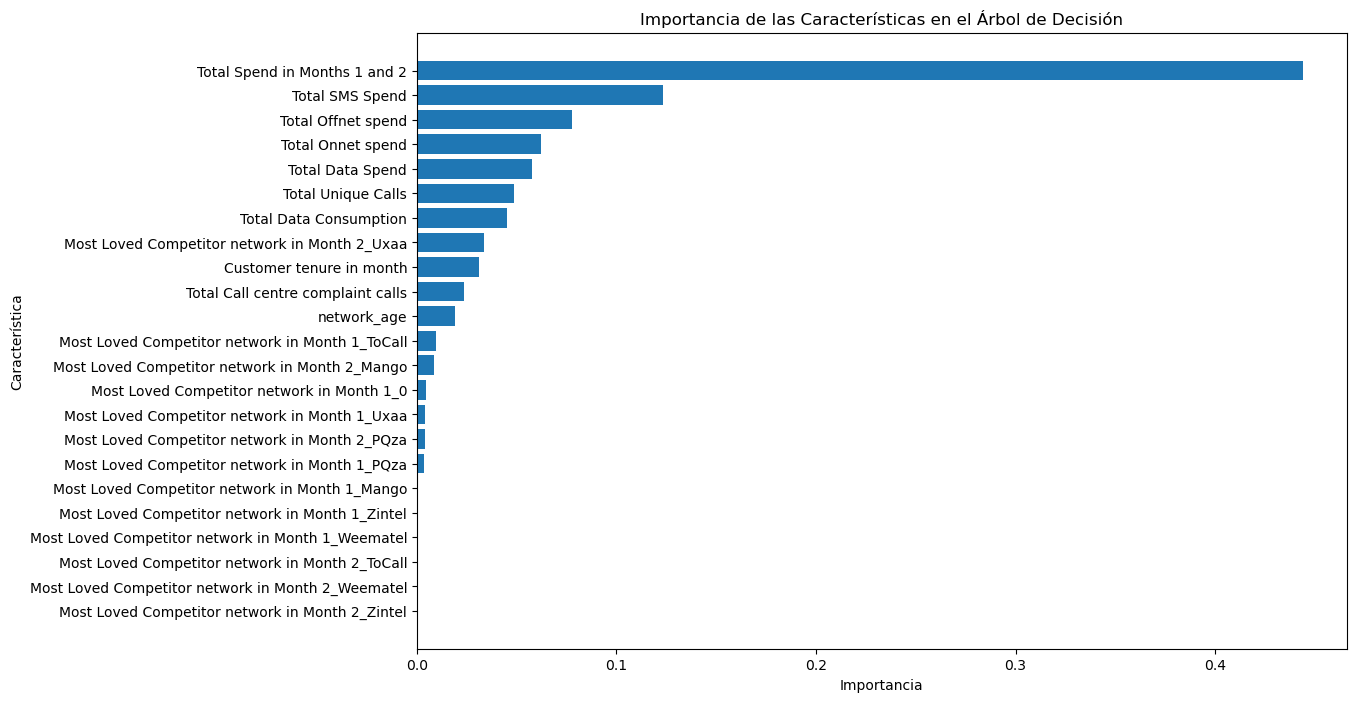

In [107]:
# Obtenemos la importancia de las distintas características del modelo.
importancias = decision_tree.feature_importances_
caracteristicas = X.columns

# Crearmos un DataFrame para visualizar mejor las importancias
df_importancias = pd.DataFrame({"Característica": caracteristicas, "Importancia": importancias})

# Ordenamos las importancias
df_importancias = df_importancias.sort_values("Importancia", ascending=False)

# Gráfica
plt.figure(figsize=(12, 8))
plt.barh(df_importancias["Característica"], df_importancias["Importancia"])
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.title("Importancia de las Características en el Árbol de Decisión")
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes estén arriba
plt.show()

Las características con mayor importancia tienen un mayor impacto en las decisiones de predicción del modelo. En este caso se ve que hay una correlación significativa con la característica "Total Spend in Months 1 and 2", ya que ocupa el lugar más alto, pero también se observa menor relación en los siguientes apartados.

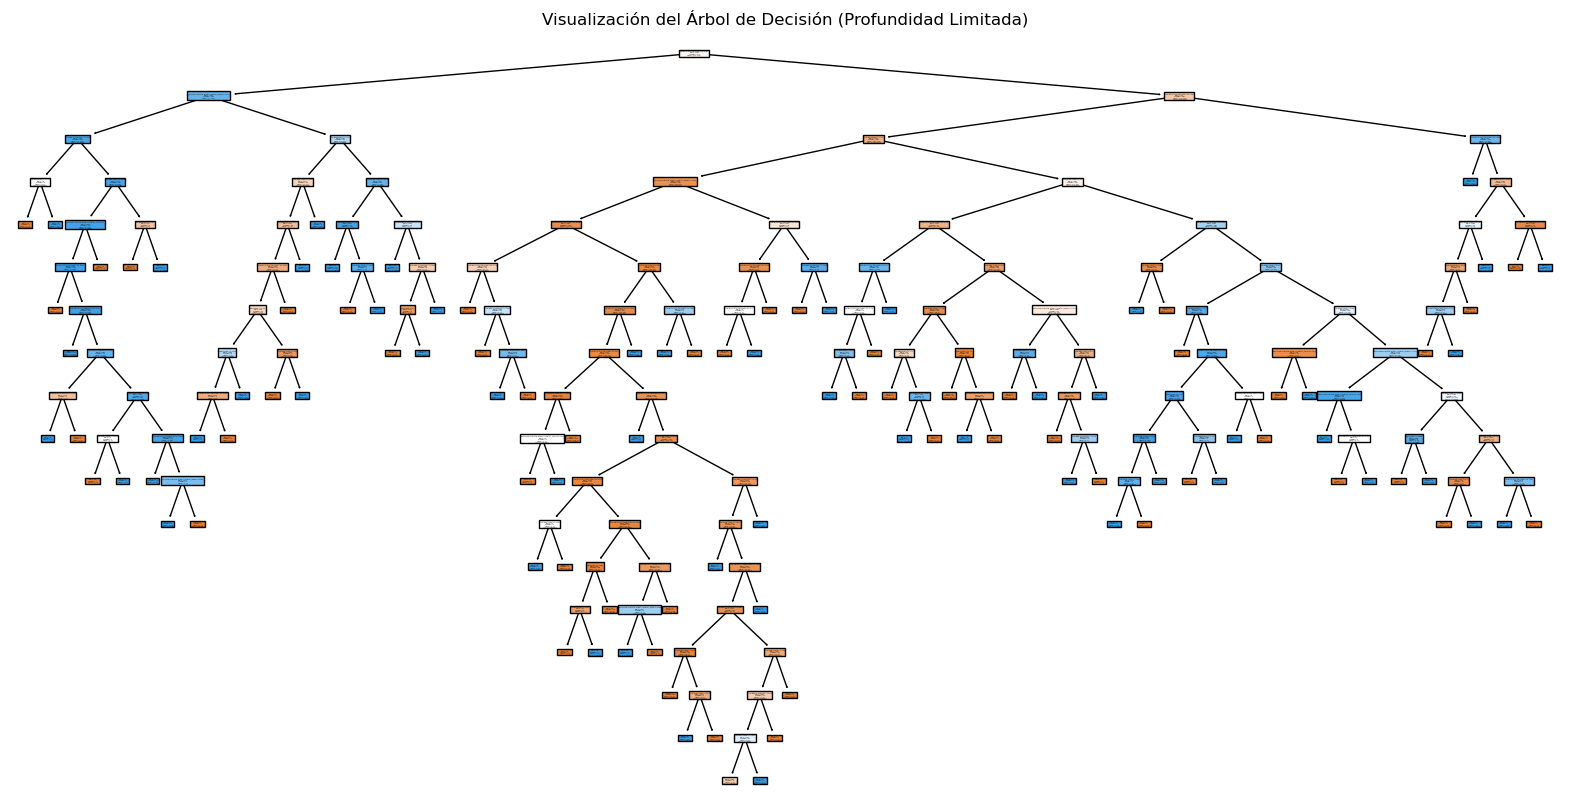

In [108]:
# Establecemos la profundidad a 17, porque es donde obtendremos mayor precisión con el método KNN.
decision_tree_visual = DecisionTreeClassifier(max_depth=17, random_state=42)
decision_tree_visual.fit(X_train_scaled, y_train)

#Figura
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree_visual, 
               feature_names=caracteristicas,  
               class_names=["Permanece", "Abandona"],
               filled=True)
plt.title("Visualización del Árbol de Decisión (Profundidad Limitada)")
plt.show()

Podemos observar como en cada nodo se aplica la consulta de una característica para determinar el resultado para una profundidad de 17, que posteriormente veremos que es la óptima.

Precisión de KNN:

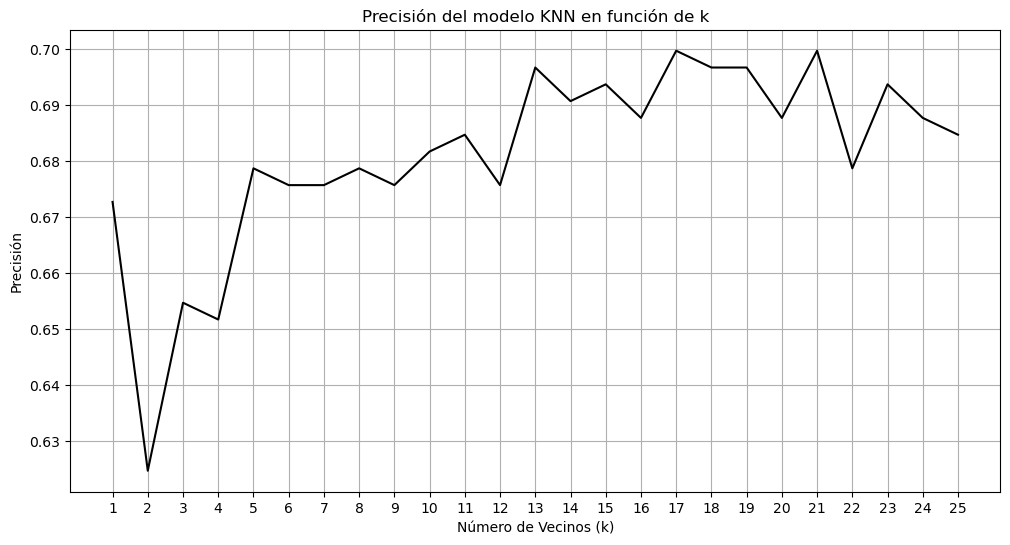

In [109]:
# Establecemos un rango hasta 26
k_values = range(1, 26)
precisiones = []

# Entrenamos modelos KNN con diferentes valores de "k" y calcular la precisión
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    precision = accuracy_score(y_test, y_pred_knn)
    precisiones.append(precision)

# Gráfica
plt.figure(figsize=(12, 6))
plt.plot(k_values, precisiones, color="black", linestyle="solid")
plt.title("Precisión del modelo KNN en función de k")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Precisión")
plt.xticks(k_values)
plt.grid(True)
plt.show()

En este caso, los valores óptimos de la profundidad son 17 y 21, dando una precisión ligeramente menor a 0.7. Al igual que en el anterior ejercicio, los valores menores a 17 alcanzan una precisión menor debido al subajuste. Por otra parte, los valores mayores a 21 tienen una precisión menor debido al sobreajuste.